In [2]:
print('done')

done


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

# Base directory where the dataset is mounted
base_dir = "/kaggle/input/sicapv2"

# Check directory structure
for root, dirs, files in os.walk(base_dir):
    print(f"{root} -> {len(files)} files")


/kaggle/input/sicapv2 -> 0 files
/kaggle/input/sicapv2/SICAPv2 -> 0 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2 -> 2 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/images -> 18783 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition -> 0 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition/Validation -> 0 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition/Validation/Val3 -> 4 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition/Validation/Val4 -> 4 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition/Validation/Val2 -> 4 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition/Validation/Val1 -> 4 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition/Test -> 4 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/masks -> 18783 files


In [4]:
import os

image_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/images"
print("Files in images dir:", os.listdir(image_dir)[:5])


Files in images dir: ['16B0006669_Block_Region_24_6_2_xini_14275_yini_13598.jpg', '18B0005230E_Block_Region_5_11_23_xini_38257_yini_96363.jpg', '18B0006621D_Block_Region_2_1_13_xini_21582_yini_66086.jpg', '18B0006177A_Block_Region_2_6_19_xini_51693_yini_147491.jpg', '16B0022612_Block_Region_1_20_12_xini_15667_yini_92428.jpg']


Total images found: 18783


[ WARN:0@38.522] global loadsave.cpp:268 findDecoder imread_('/kaggle/input/sicapv2/SICAPv2/SICAPv2/masks/17B0017717_Block_Region_2_29_3_xini_9885_yini_74711.png'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

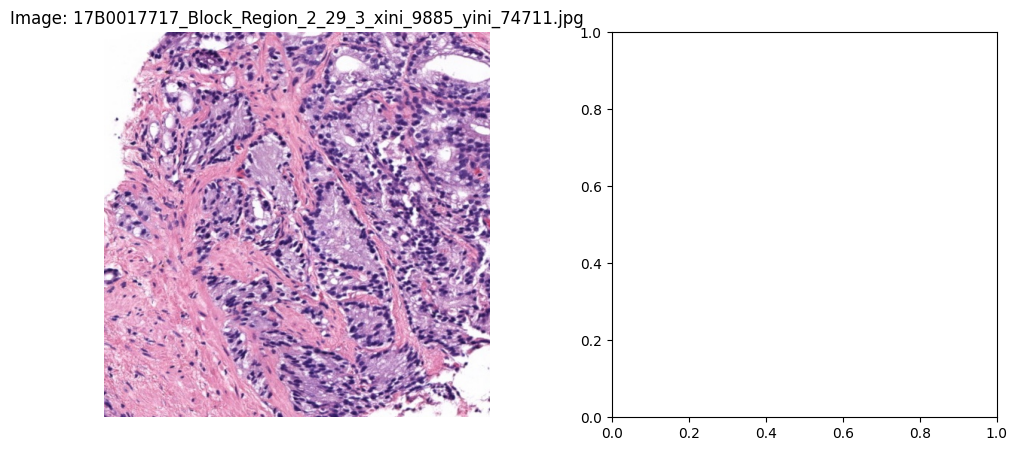

In [5]:
import random
from glob import glob
import cv2
import matplotlib.pyplot as plt
import os

# Correct image and mask paths
image_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/images"
mask_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/masks"

# Use .jpg extension
image_paths = glob(os.path.join(image_dir, "*.jpg"))
print(f"Total images found: {len(image_paths)}")

# Random sample
sample_image_path = random.choice(image_paths)
filename = os.path.basename(sample_image_path)
sample_mask_path = os.path.join(mask_dir, filename.replace(".jpg", ".png"))  # Masks might be .png

# Load image and mask
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.imread(sample_mask_path, cv2.IMREAD_GRAYSCALE)

# Display side by side
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title(f"Image: {filename}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='jet')
plt.title("Mask (Labels)")
plt.axis('off')
plt.show()


In [7]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from glob import glob

# Correct paths
image_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/images"
mask_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/masks"

# Load all image paths
image_paths = glob(os.path.join(image_dir, "*.jpg"))
print(f"Total images found: {len(image_paths)}")

# Try until we find a pair where mask exists
for _ in range(20):
    sample_image_path = random.choice(image_paths)
    filename = os.path.basename(sample_image_path)
    mask_path = os.path.join(mask_dir, filename.replace(".jpg", ".png"))
    
    if os.path.exists(mask_path):
        print("Found matching mask for:", filename)
        break
else:
    raise FileNotFoundError("No matching masks found for any image.")

# Load image and mask
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Sanity check
print("Image shape:", image.shape)
print("Mask shape:", mask.shape)
print("Unique mask values:", np.unique(mask))

# Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title(f"Image: {filename}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='jet')
plt.title("Mask (Labels)")
plt.axis('off')
plt.show()


Total images found: 18783


FileNotFoundError: No matching masks found for any image.

In [8]:
import os

mask_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/masks"
mask_files = os.listdir(mask_dir)
print(f"Total masks: {len(mask_files)}")
print("Sample mask filenames:", mask_files[:10])


Total masks: 18783
Sample mask filenames: ['16B0006669_Block_Region_24_6_2_xini_14275_yini_13598.jpg', '18B0005230E_Block_Region_5_11_23_xini_38257_yini_96363.jpg', '18B0006621D_Block_Region_2_1_13_xini_21582_yini_66086.jpg', '18B0006177A_Block_Region_2_6_19_xini_51693_yini_147491.jpg', '16B0022612_Block_Region_1_20_12_xini_15667_yini_92428.jpg', '17B0035220_Block_Region_5_22_18_xini_39584_yini_76503.jpg', '16B0022615_Block_Region_4_19_41_xini_44968_yini_22920.jpg', '17B0034247_Block_Region_2_21_7_xini_39052_yini_24363.jpg', '18B0005478I_Block_Region_2_13_11_xini_19020_yini_148142.jpg', '17B0027608_Block_Region_7_16_43_xini_59764_yini_61267.jpg']


Total images found: 18783
✅ Found matching image + mask for: 16B0028914_Block_Region_3_14_15_xini_34280_yini_63764.jpg
Image shape: (512, 512, 3)
Mask shape: (512, 512)
Unique values in mask: [0]


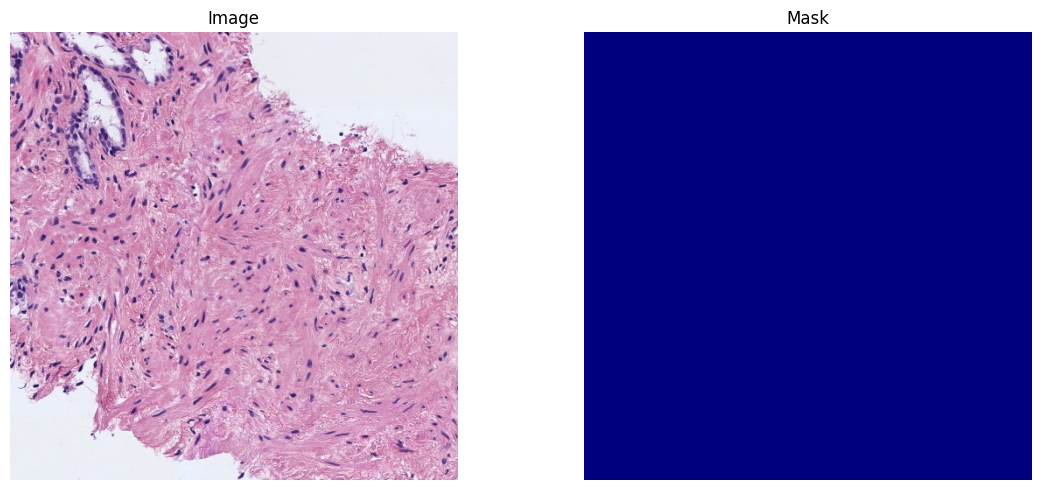

In [9]:
import random
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

# Correct image and mask directories
image_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/images"
mask_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/masks"

# Get list of image files
image_paths = glob(os.path.join(image_dir, "*.jpg"))
print(f"Total images found: {len(image_paths)}")

# Try loading image-mask pair
for _ in range(20):
    sample_image_path = random.choice(image_paths)
    filename = os.path.basename(sample_image_path)
    sample_mask_path = os.path.join(mask_dir, filename)  # No extension change now

    if os.path.exists(sample_mask_path):
        print("✅ Found matching image + mask for:", filename)
        break
else:
    raise FileNotFoundError("No matching masks found for any image.")

# Load image and mask
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.imread(sample_mask_path, cv2.IMREAD_GRAYSCALE)

# Print some sanity info
print("Image shape:", image.shape)
print("Mask shape:", mask.shape)
print("Unique values in mask:", np.unique(mask))

# Show image and mask
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='jet')
plt.title("Mask")
plt.axis("off")

plt.tight_layout()
plt.show()


In [10]:
import pandas as pd

# Path to Excel label file
xlsx_path = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/wsi_labels.xlsx"

# Read Excel
df = pd.read_excel(xlsx_path)

# Your GG logic
def gleason_to_gg(primary, secondary):
    total = primary + secondary
    if total == 7 and primary == 4:
        return "GG3"
    elif total == 8:
        return "GG4"
    elif total >= 9:
        return "GG5"
    else:
        return "NC"

df["GG"] = df.apply(lambda row: gleason_to_gg(row["Gleason_primary"], row["Gleason_secondary"]), axis=1)

print(df.head())
print(df["GG"].value_counts())


     slide_id  patient_id  Gleason_primary  Gleason_secondary   GG
0  16B0001851      667360                4                  5  GG5
1  16B0003388      325687                4                  4  GG4
2  16B0003394      747184                3                  3   NC
3  16B0006668       14107                5                  5  GG5
4  16B0006669       14107                5                  5  GG5
GG
NC     72
GG5    42
GG3    23
GG4    18
Name: count, dtype: int64


In [11]:
from glob import glob
import pandas as pd
import os

# Load GG labels
labels_df = pd.read_excel("/kaggle/input/sicapv2/SICAPv2/SICAPv2/wsi_labels.xlsx")
def gleason_to_gg(primary, secondary):
    total = primary + secondary
    if total == 7 and primary == 4:
        return "GG3"
    elif total == 8:
        return "GG4"
    elif total >= 9:
        return "GG5"
    else:
        return "NC"
labels_df["GG"] = labels_df.apply(lambda row: gleason_to_gg(row["Gleason_primary"], row["Gleason_secondary"]), axis=1)

# Create a dictionary for quick lookup
slideid_to_gg = dict(zip(labels_df["slide_id"].astype(str), labels_df["GG"]))

# Grab all patch image paths
patch_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/images"
patch_paths = glob(os.path.join(patch_dir, "*.jpg"))

# Build dataframe with patch paths and labels
patch_data = []
for path in patch_paths:
    filename = os.path.basename(path)
    slide_id = filename.split("_")[0]
    if slide_id in slideid_to_gg:
        label = slideid_to_gg[slide_id]
        patch_data.append((path, label))

# Create final dataframe
patch_df = pd.DataFrame(patch_data, columns=["path", "label"])
print("Total labeled patches:", len(patch_df))
print(patch_df["label"].value_counts())
patch_df.head()


Total labeled patches: 18783
label
NC     7995
GG5    5654
GG3    3082
GG4    2052
Name: count, dtype: int64


,path,label
0,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,GG5
1,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,NC
2,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,GG3
3,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,GG5
4,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,NC


In [12]:
!pip install timm

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import timm
from sklearn.model_selection import train_test_split


In [13]:
train_df, temp_df = train_test_split(
    patch_df, 
    test_size=0.2, 
    stratify=patch_df["label"], 
    random_state=42
)
val_df, test_df = train_test_split(
    temp_df, 
    test_size=0.5, 
    stratify=temp_df["label"], 
    random_state=42
)

print(len(train_df), len(val_df), len(test_df))


15026 1878 1879


In [14]:
class SICAPDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.label2idx = {"NC": 0, "GG3": 1, "GG4": 2, "GG5": 3}
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_path = self.df.loc[idx, "path"]
        label = self.label2idx[self.df.loc[idx, "label"]]
        
        # Read image
        image = cv2.imread(img_path)
        if image is None:
            raise FileNotFoundError(f"Image not found: {img_path}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        if self.transform:
            image = self.transform(image)
        
        # Ensure label is int (not array/tensor)
        return image, torch.tensor(label, dtype=torch.long)


In [15]:
IMG_SIZE = 224

train_tfms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])

val_tfms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5])
])

train_dataset = SICAPDataset(train_df, transform=train_tfms)
val_dataset = SICAPDataset(val_df, transform=val_tfms)
test_dataset = SICAPDataset(test_df, transform=val_tfms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)


In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = timm.create_model("swin_base_patch4_window7_224", pretrained=True)
model.head = nn.Linear(model.head.in_features, 4)  # 4 classes

model = model.to(device)


In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)


In [18]:
transform = transforms.Compose([
    transforms.Resize((192, 192)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [19]:
!pip -q install timm

import os
import random
import math
import json
import cv2
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import timm

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# -------------------------------------------------
# Repro & CUDA housekeeping
# -------------------------------------------------
SEED = 42
random.seed(SEED); np.random.seed(SEED); torch.manual_seed(SEED)
torch.backends.cudnn.benchmark = True
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# -------------------------------------------------
# Config (tweak here if needed)
# -------------------------------------------------
BASE_DIR   = "/kaggle/input/sicapv2/SICAPv2/SICAPv2"
IMG_DIR    = f"{BASE_DIR}/images"
XLSX_PATH  = f"{BASE_DIR}/wsi_labels.xlsx"

# Model: pick one (tiny/small/base). Start with 'small' to avoid OOM.
MODEL_NAME = "swin_small_patch4_window7_224"   # try 'swin_base_patch4_window7_224' later if you have VRAM
IMG_SIZE   = 224                               # 224 is standard; drop to 192 if still OOM
BATCH_SIZE = 4                                 # start conservative; try 8 if memory allows
EPOCHS     = 10
LR         = 1e-4
WEIGHT_DECAY = 1e-4
GRAD_ACCUM_STEPS = 1                           # set >1 if you want effective larger batch with less memory

NUM_WORKERS = 2
PIN_MEMORY  = True

# label mapping
CLASSES = ["NC", "GG3", "GG4", "GG5"]
LABEL2IDX = {c:i for i,c in enumerate(CLASSES)}
IDX2LABEL = {i:c for c,i in LABEL2IDX.items()}

print("Config OK ✅")


Device: cuda
Config OK ✅


In [20]:
# Read Excel and map Gleason -> GG
labels_df = pd.read_excel(XLSX_PATH)

def gleason_to_gg(primary, secondary):
    total = primary + secondary
    if total == 7 and primary == 4:
        return "GG3"
    elif total == 8:
        return "GG4"
    elif total >= 9:
        return "GG5"
    else:
        return "NC"

labels_df["GG"] = labels_df.apply(lambda r: gleason_to_gg(r["Gleason_primary"], r["Gleason_secondary"]), axis=1)
slideid_to_gg = dict(zip(labels_df["slide_id"].astype(str), labels_df["GG"]))

# Collect patches
patch_paths = glob(os.path.join(IMG_DIR, "*.jpg"))
patch_data = []
for p in patch_paths:
    fname = os.path.basename(p)
    slide = fname.split("_")[0]
    if slide in slideid_to_gg:
        patch_data.append((p, slideid_to_gg[slide]))

patch_df = pd.DataFrame(patch_data, columns=["path", "label"])
print("Total labeled patches:", len(patch_df))
print(patch_df["label"].value_counts())
patch_df.head()


Total labeled patches: 18783
label
NC     7995
GG5    5654
GG3    3082
GG4    2052
Name: count, dtype: int64


,path,label
0,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,GG5
1,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,NC
2,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,GG3
3,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,GG5
4,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,NC


In [42]:
!pip install -U scikit-learn imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 65.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.

In [46]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
import cv2
import torch
from torchvision import transforms

# Label mapping (string → int)
LABEL2IDX = {label: idx for idx, label in enumerate(sorted(patch_df["label"].unique()))}

# Train/Val/Test split (stratified)
train_df, temp_df = train_test_split(
    patch_df, test_size=0.2, stratify=patch_df["label"], random_state=SEED
)
val_df, test_df = train_test_split(
    temp_df, test_size=0.5, stratify=temp_df["label"], random_state=SEED
)

print(f"Train: {len(train_df)} | Val: {len(val_df)} | Test: {len(test_df)}")

# 🔍 Check label distribution after split
print("\nLabel distribution after split:")
print("Train:\n", train_df["label"].value_counts())
print("\nVal:\n", val_df["label"].value_counts())
print("\nTest:\n", test_df["label"].value_counts())

# Dataset class
class SICAPDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df.reset_index(drop=True)
        self.transform = transform
        self.label2idx = LABEL2IDX  # store mapping inside the dataset

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.iloc[idx]["path"]  # ✅ iloc fixes index mismatch
        label_name = self.df.iloc[idx]["label"]
        label = self.label2idx[label_name]

        img = cv2.imread(img_path)
        if img is None:
            raise FileNotFoundError(f"Image not found: {img_path}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if self.transform:
            img = self.transform(img)

        return img, torch.tensor(label, dtype=torch.long)

# Transforms
train_tfms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_tfms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Undersample manually to match smallest class
min_count = train_df['label'].value_counts().min()
train_df = (
    train_df.groupby('label', group_keys=False)[train_df.columns]
    .apply(lambda x: x.sample(min_count, random_state=SEED))
    .reset_index(drop=True)
)



Train: 15026 | Val: 1878 | Test: 1879

Label distribution after split:
Train:
 label
NC     6396
GG5    4523
GG3    2465
GG4    1642
Name: count, dtype: int64

Val:
 label
NC     799
GG5    565
GG3    309
GG4    205
Name: count, dtype: int64

Test:
 label
NC     800
GG5    566
GG3    308
GG4    205
Name: count, dtype: int64


In [47]:
def __getitem__(self, idx):
    img_path = self.df.iloc[idx]["path"]
    label = self.label2idx[self.df.iloc[idx]["label"]]
    img = Image.open(img_path).convert("RGB")
    if self.transform:
        img = self.transform(img)
    return img, label


In [48]:
from tqdm import tqdm
import torch

def validate_one_epoch(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    progress_bar = tqdm(val_loader, desc="Validation", leave=False)

    with torch.no_grad():
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

            # Update progress bar
            progress_bar.set_postfix(loss=(running_loss / (progress_bar.n + 1)), accuracy=(100 * correct_predictions / total_predictions))

    val_loss = running_loss / len(val_loader)
    val_accuracy = 100 * correct_predictions / total_predictions

    return val_loss, val_accuracy

In [49]:
# Collect patches
patch_paths = glob(os.path.join(IMG_DIR, "*.jpg"))

patch_data = []
for p in patch_paths:
    fname = os.path.basename(p)
    slide = fname.split("_")[0]
    if slide in slideid_to_gg:
        patch_data.append((p, slideid_to_gg[slide]))

patch_df = pd.DataFrame(patch_data, columns=["path", "label"])
print("Total labeled patches:", len(patch_df))
print(patch_df["label"].value_counts())


Total labeled patches: 18783
label
NC     7995
GG5    5654
GG3    3082
GG4    2052
Name: count, dtype: int64


In [50]:
from torch.utils.data import DataLoader, WeightedRandomSampler

class_sample_counts = patch_df["label"].value_counts().to_dict()
samples_weight = [1.0 / class_sample_counts[label] for label in patch_df["label"]]
samples_weight = torch.tensor(samples_weight, dtype=torch.float32)

sampler = WeightedRandomSampler(samples_weight, num_samples=len(samples_weight), replacement=True)

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)


In [51]:
# Datasets
train_dataset = SICAPDataset(train_df, transform=train_tfms)
val_dataset   = SICAPDataset(val_df, transform=val_tfms)
test_dataset  = SICAPDataset(test_df, transform=val_tfms)

# DataLoaders
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

print(f"Train batches: {len(train_loader)}")
print(f"Val batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")


Train batches: 206
Val batches: 59
Test batches: 59


In [52]:
import timm
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = len(LABEL2IDX)
model = timm.create_model("resnet50", pretrained=True, num_classes=num_classes)
model = model.to(device)

# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

In [53]:
EPOCHS = 10
save_dir = "checkpoints"
os.makedirs(save_dir, exist_ok=True)

best_val_acc = 0.0

for epoch in range(EPOCHS):
    print(f"\nEpoch [{epoch+1}/{EPOCHS}]")
    
    # ---- Training ----
    model.train()
    running_loss = 0.0
    correct, total = 0, 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * imgs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_dataset)
    train_acc = 100 * correct / total
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")

    # ---- Validation ----
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * imgs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_loss /= len(val_dataset)
    val_acc = 100 * correct / total
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

    # Save checkpoint every epoch
    checkpoint_path = os.path.join(save_dir, f"epoch_{epoch+1}.pth")
    torch.save(model.state_dict(), checkpoint_path)
    print(f"Checkpoint saved: {checkpoint_path}")

    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), os.path.join(save_dir, "best_model.pth"))
        print("Best model updated ✅")

print("\nTraining complete!")


Epoch [1/10]
Train Loss: 1.3098, Train Acc: 42.10%
Val Loss: 1.1203, Val Acc: 53.46%
Checkpoint saved: checkpoints/epoch_1.pth
Best model updated ✅

Epoch [2/10]
Train Loss: 1.0649, Train Acc: 54.60%
Val Loss: 0.9413, Val Acc: 61.87%
Checkpoint saved: checkpoints/epoch_2.pth
Best model updated ✅

Epoch [3/10]
Train Loss: 0.9070, Train Acc: 62.23%
Val Loss: 0.7980, Val Acc: 68.53%
Checkpoint saved: checkpoints/epoch_3.pth
Best model updated ✅

Epoch [4/10]
Train Loss: 0.7922, Train Acc: 67.16%
Val Loss: 0.6988, Val Acc: 74.17%
Checkpoint saved: checkpoints/epoch_4.pth
Best model updated ✅

Epoch [5/10]
Train Loss: 0.6852, Train Acc: 72.44%
Val Loss: 0.6463, Val Acc: 75.67%
Checkpoint saved: checkpoints/epoch_5.pth
Best model updated ✅

Epoch [6/10]
Train Loss: 0.5935, Train Acc: 76.54%
Val Loss: 0.6238, Val Acc: 76.14%
Checkpoint saved: checkpoints/epoch_6.pth
Best model updated ✅

Epoch [7/10]
Train Loss: 0.5306, Train Acc: 79.61%
Val Loss: 0.5477, Val Acc: 78.12%
Checkpoint saved: ch

In [54]:
import torch
import os

# --- Settings ---
extra_epochs = 5
best_model_path = os.path.join("checkpoints", "best_model.pth")

# --- Load best model ---
model.load_state_dict(torch.load(best_model_path, map_location=device))
print(f"✅ Loaded best model from: {best_model_path}")

# Continue training
for epoch in range(1, extra_epochs + 1):
    print(f"\n[Extra Training] Epoch {epoch}/{extra_epochs}")
    
    # ---- Training ----
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * imgs.size(0)
        _, preds = outputs.max(1)
        total += labels.size(0)
        correct += preds.eq(labels).sum().item()

    train_loss = running_loss / len(train_dataset)
    train_acc = 100.0 * correct / total
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")

    # ---- Validation ----
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * imgs.size(0)
            _, preds = outputs.max(1)
            total += labels.size(0)
            correct += preds.eq(labels).sum().item()

    val_loss /= len(val_dataset)
    val_acc = 100.0 * correct / total
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

    # Save checkpoint
    ckpt_path = os.path.join("checkpoints", f"extra_epoch_{epoch}.pth")
    torch.save(model.state_dict(), ckpt_path)
    print(f"💾 Extra checkpoint saved: {ckpt_path}")

# Save final fine-tuned model
torch.save(model.state_dict(), os.path.join("checkpoints", "final_finetuned.pth"))
print("🎯 Fine-tuning complete!")


✅ Loaded best model from: checkpoints/best_model.pth

[Extra Training] Epoch 1/5
Train Loss: 0.3164, Train Acc: 88.52%
Val Loss: 0.3930, Val Acc: 85.84%
💾 Extra checkpoint saved: checkpoints/extra_epoch_1.pth

[Extra Training] Epoch 2/5
Train Loss: 0.2889, Train Acc: 89.40%
Val Loss: 0.4657, Val Acc: 83.28%
💾 Extra checkpoint saved: checkpoints/extra_epoch_2.pth

[Extra Training] Epoch 3/5
Train Loss: 0.2657, Train Acc: 90.12%
Val Loss: 0.4511, Val Acc: 83.39%
💾 Extra checkpoint saved: checkpoints/extra_epoch_3.pth

[Extra Training] Epoch 4/5
Train Loss: 0.2489, Train Acc: 91.21%
Val Loss: 0.3645, Val Acc: 87.06%
💾 Extra checkpoint saved: checkpoints/extra_epoch_4.pth

[Extra Training] Epoch 5/5
Train Loss: 0.2163, Train Acc: 92.51%
Val Loss: 0.3439, Val Acc: 87.33%
💾 Extra checkpoint saved: checkpoints/extra_epoch_5.pth
🎯 Fine-tuning complete!


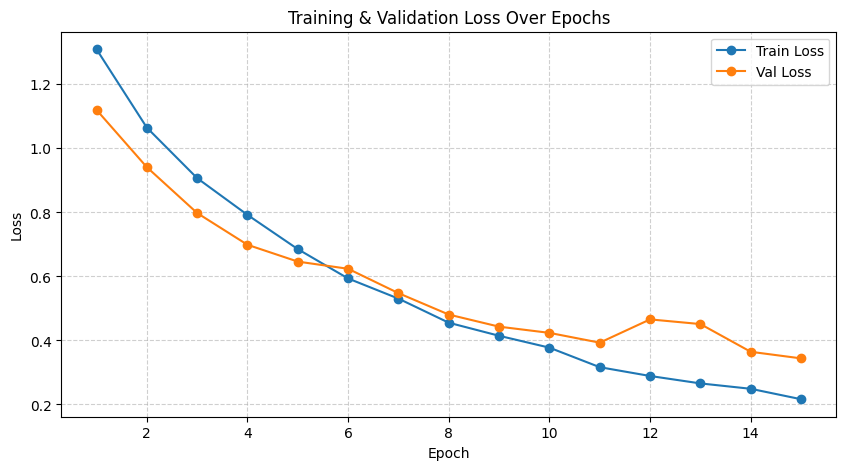

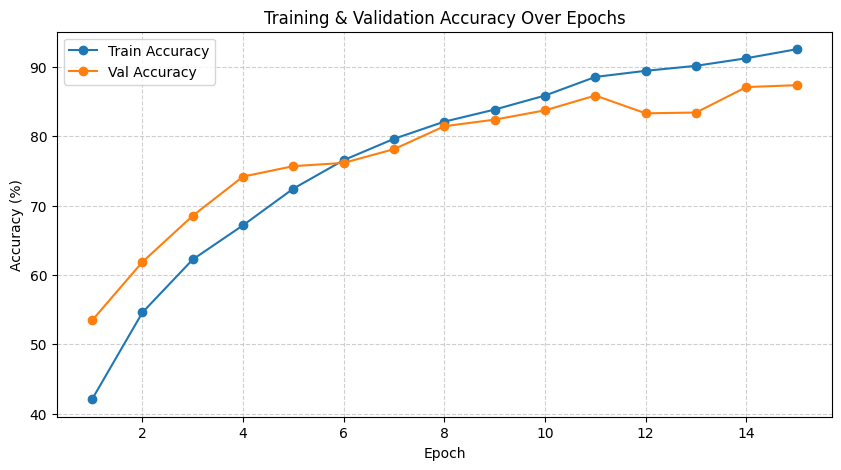

In [55]:
import matplotlib.pyplot as plt

# Full training history
train_loss = [
    1.3098, 1.0649, 0.9070, 0.7922, 0.6852,
    0.5935, 0.5306, 0.4553, 0.4145, 0.3774,
    0.3164, 0.2889, 0.2657, 0.2489, 0.2163
]

val_loss = [
    1.1203, 0.9413, 0.7980, 0.6988, 0.6463,
    0.6238, 0.5477, 0.4808, 0.4430, 0.4236,
    0.3930, 0.4657, 0.4511, 0.3645, 0.3439
]

train_acc = [
    42.10, 54.60, 62.23, 67.16, 72.44,
    76.54, 79.61, 82.08, 83.82, 85.84,
    88.52, 89.40, 90.12, 91.21, 92.51
]

val_acc = [
    53.46, 61.87, 68.53, 74.17, 75.67,
    76.14, 78.12, 81.42, 82.37, 83.71,
    85.84, 83.28, 83.39, 87.06, 87.33
]

epochs = range(1, len(train_loss) + 1)

# Loss plot
plt.figure(figsize=(10,5))
plt.plot(epochs, train_loss, 'o-', label="Train Loss")
plt.plot(epochs, val_loss, 'o-', label="Val Loss")
plt.title("Training & Validation Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Accuracy plot
plt.figure(figsize=(10,5))
plt.plot(epochs, train_acc, 'o-', label="Train Accuracy")
plt.plot(epochs, val_acc, 'o-', label="Val Accuracy")
plt.title("Training & Validation Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [56]:
import torch

# Path to last epoch checkpoint (15th total = extra_epoch_5)
last_ckpt_path = "checkpoints/extra_epoch_5.pth"

# Load the model
model.load_state_dict(torch.load(last_ckpt_path, map_location=device))
model.to(device)
model.eval()

# Evaluation on test set
test_loss, correct, total = 0.0, 0, 0

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * imgs.size(0)
        _, preds = outputs.max(1)
        total += labels.size(0)
        correct += preds.eq(labels).sum().item()

# Final metrics
test_loss /= len(test_dataset)
test_acc = 100.0 * correct / total

print(f"📊 Test Loss (Last Epoch): {test_loss:.4f}")
print(f"✅ Test Accuracy (Last Epoch): {test_acc:.2f}%")


📊 Test Loss (Last Epoch): 0.3163
✅ Test Accuracy (Last Epoch): 87.81%


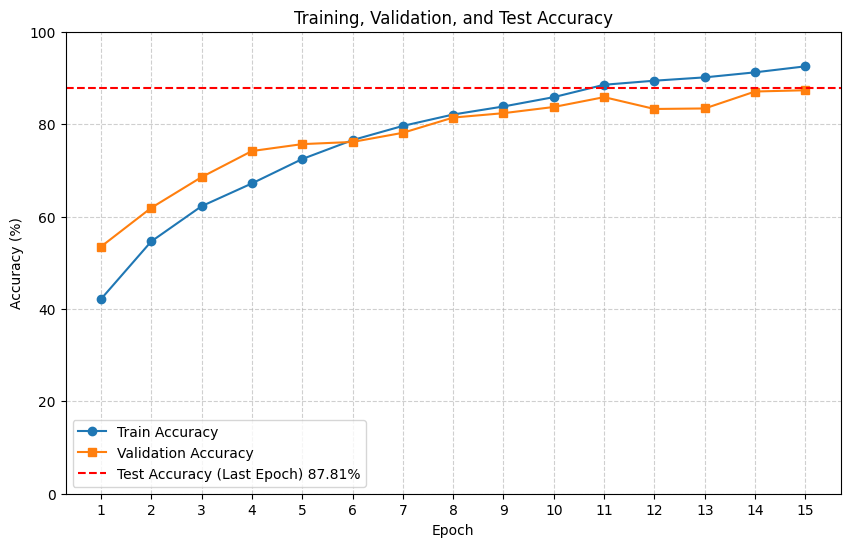

In [57]:
import matplotlib.pyplot as plt

# Data from your logs
train_acc = [
    42.10, 54.60, 62.23, 67.16, 72.44, 76.54, 79.61, 82.08, 83.82, 85.84, 
    88.52, 89.40, 90.12, 91.21, 92.51
]

val_acc = [
    53.46, 61.87, 68.53, 74.17, 75.67, 76.14, 78.12, 81.42, 82.37, 83.71, 
    85.84, 83.28, 83.39, 87.06, 87.33
]

# Only one test accuracy (last epoch)
test_acc_last = 87.81

epochs = list(range(1, 16))

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, marker='o', label='Train Accuracy')
plt.plot(epochs, val_acc, marker='s', label='Validation Accuracy')
plt.axhline(y=test_acc_last, color='red', linestyle='--', label=f'Test Accuracy (Last Epoch) {test_acc_last:.2f}%')

plt.title("Training, Validation, and Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.xticks(epochs)
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


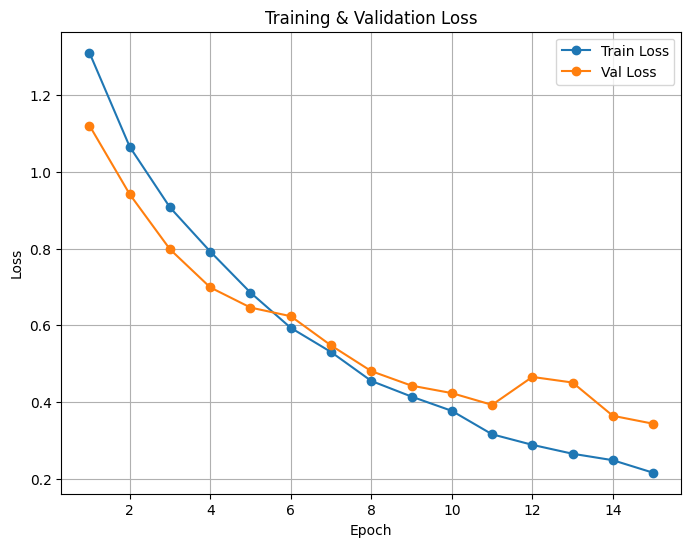

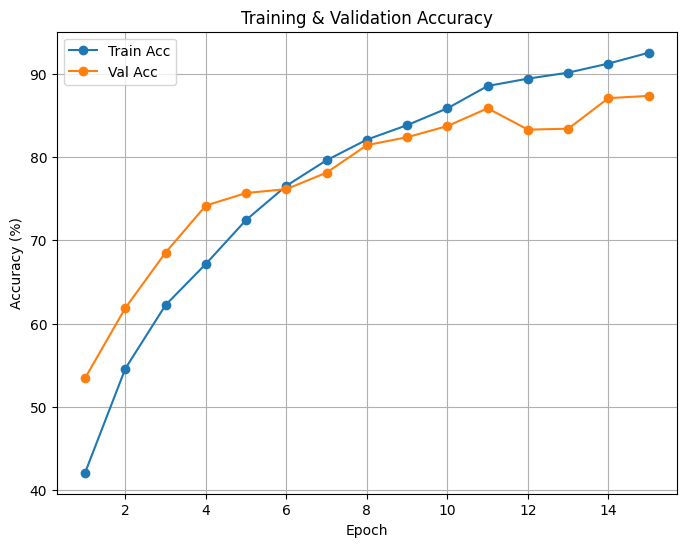

In [61]:
import torch

# Path to last epoch checkpoint
last_ckpt_path = "checkpoints/extra_epoch_5.pth"  # 15th epoch in your case
final_model_path = "swin_transformer_final.pth"

# Load weights
model.load_state_dict(torch.load(last_ckpt_path, map_location=device))

# Save in a ready-to-use format
torch.save(model.state_dict(), final_model_path)
print(f"✅ Final model saved as: {final_model_path}")


✅ Final model saved as: swin_transformer_final.pth


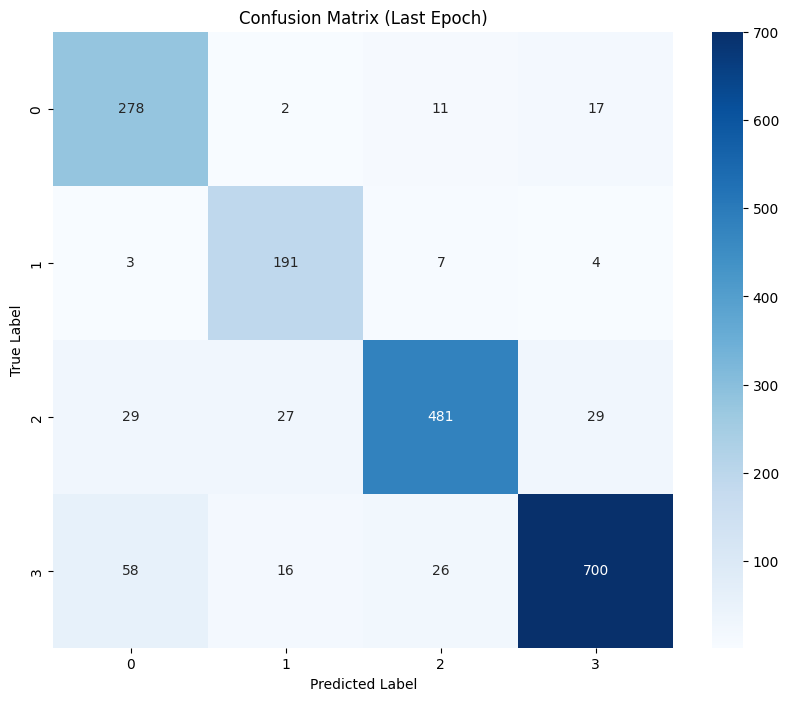

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       308
           1       0.81      0.93      0.87       205
           2       0.92      0.85      0.88       566
           3       0.93      0.88      0.90       800

    accuracy                           0.88      1879
   macro avg       0.85      0.89      0.87      1879
weighted avg       0.89      0.88      0.88      1879



In [62]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# --- Load last epoch model ---
last_ckpt_path = "checkpoints/extra_epoch_5.pth"
model.load_state_dict(torch.load(last_ckpt_path, map_location=device))
model.to(device)
model.eval()

# --- Get predictions ---
all_preds = []
all_labels = []

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# --- Confusion Matrix ---
cm = confusion_matrix(all_labels, all_preds)
class_names = test_dataset.classes if hasattr(test_dataset, 'classes') else list(map(str, set(all_labels)))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix (Last Epoch)")
plt.show()

# --- Classification Report ---
print("Classification Report:\n")
print(classification_report(all_labels, all_preds, target_names=class_names))
